#Post Processing of Illustrative Experiments

Author: Ufuk Usubutun - usubutun[at]nyu[dot]edu
<br><br>

Sample files used in the paper are provided in the containing repository.

Below you'll find the post processing scripts for both cwnd and pcap captures.<br><br>

## Processing of cwnd Captures

code used for RACK journal extension mini exps
new approach used in this file:
```
#better method to capture tcp stats

# become root
sudo su

# one time only
apt install trace-cmd

# repeat on each reboot
echo 1 > /sys/kernel/debug/tracing/events/tcp/tcp_probe/enable

# before each connection
trace-cmd record --date -e tcp_probe

# after flow ends, use Ctrl+C to stop recording
# then play back with
trace-cmd report

trace-cmd report > expname-log.txt
```




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sb

In [ ]:
import re
import pandas as pd

# Define the log file path
#log_file = "/content/drive/MyDrive/rack simpler exps/rack-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/dupack-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/dupack-longerOOODelay-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/dupack-longerOOODelay40-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/rack-longerOOODelay40-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/rack-longerOOODelay-log.txt"

#complete experiments 5/24/24 - all 10 mbps

# exp1 - larger delay diff for ooo packet
# 80ms buffer delay
# 10 ms reverese direction delay
# 10 or 40 ms forward netem delay
# every 1000th packet goes to longer delay
log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exps0and1/exp1-dupack-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exps0and1/exp1-adapthresh-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exps0and1/exp1-rack-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/rackLongerexp1/rackLonger-log.txt" # rack with 120 secs
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exps0and1/exp0-rack-noreord-log.txt" # only 10 ms forward netem delay

# exp2 - smaller delay diff for ooo packet
# 80ms buffer delay
# 10 ms reverese direction delay
# 10 or 20 ms forward netem delay
# every 1000th packet goes to longer delay
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exp2/exp2-repeat-dupack-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exp2/exp2-repeat-adapthresh-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exp2/exp2-repeat-rack-log.txt"

# exp3 - severe reord, shorter delay
# 20ms buffer delay
# 5 ms reverese direction delay
# 5 or 10 ms forward netem delay
# every 1000th packet goes to longer delay
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exp3/exp3-repeat-dupack-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exp3/exp3-repeat-adapthresh-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exp3/exp3-repeat-rack-log.txt"


#quasi-multipath experiments 5/31/24 - all 10 mbps

# exp1 - smaller delay diff for ooo packet
# 80ms buffer delay
# 10 ms reverese direction delay
# 10 or 20 ms forward netem delay
# every other packet goes to longer delay
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp0/exp0-rack-noreord-log.txt" #no reord
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp1/exp1-rack-log.txt" #rack
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp1/exp1-adapthresh-log.txt" #adapthresh
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp1/exp1-dupack-log.txt" #dupack

# exp2 - medium delay diff for ooo packet
# 80ms buffer delay
# 10 ms reverese direction delay
# 10 or 40 ms forward netem delay
# every other packet goes to longer delay
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp2/exp2-rack-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp2/exp2-adapthresh-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp2/exp2-dupack-log.txt"

# exp3 - large delay diff for ooo packet
# 80ms buffer delay
# 10 ms reverese direction delay
# 10 or 70 ms forward netem delay
# every other packet goes to longer delay
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp3/exp3-rack-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp3/exp3-adapthresh-log.txt"
#log_file = "/content/drive/MyDrive/rack simpler exps/5_31_24_quasimultipath/exp3/exp3-dupack-log.txt"


# Read the log file
with open(log_file, "r") as file:
    log_data = file.read()


# Regular expression to extract log fields
log_pattern = re.compile(
    r'\s*(?P<process>\S+)\s+\[\d+\]\s+(?P<timestamp>[\d\.]+): tcp_probe:\s+src=(?P<src_ip>\S+):(?P<src_port>\d+)\s+'
    r'dest=(?P<dest_ip>\S+):(?P<dest_port>\d+)\s+mark=(?P<mark>\d+)\s+data_len=(?P<data_len>\d+)\s+'
    r'snd_nxt=(?P<snd_nxt>0x[\da-f]+)\s+snd_una=(?P<snd_una>0x[\da-f]+)\s+snd_cwnd=(?P<snd_cwnd>\d+)\s+'
    r'ssthresh=(?P<ssthresh>\d+)\s+snd_wnd=(?P<snd_wnd>\d+)\s+srtt=(?P<srtt>\d+)\s+'
    r'rcv_wnd=(?P<rcv_wnd>\d+)\s+sock_cookie=(?P<sock_cookie>[\da-f]+)'
)

# Parse log and extract fields
log_entries = []
for line in log_data.splitlines():
    match = log_pattern.match(line)
    if match:
        log_entries.append(match.groupdict())
    else:
        print(f"Unexpected format for line: {line.strip()}")


''' previous version
# Regular expression to extract log fields
log_pattern = re.compile(
    r'\s*(?P<process>\S+)\s+\[\d+\]\s+(?P<timestamp>[\d\.]+): tcp_probe:\s+src=(?P<src_ip>\S+):(?P<src_port>\d+)\s+'
    r'dest=(?P<dest_ip>\S+):(?P<dest_port>\d+)\s+mark=(?P<mark>\d+)\s+data_len=(?P<data_len>\d+)\s+'
    r'snd_nxt=(?P<snd_nxt>0x[\da-f]+)\s+snd_una=(?P<snd_una>0x[\da-f]+)\s+snd_cwnd=(?P<snd_cwnd>\d+)\s+'
    r'ssthresh=(?P<ssthresh>\d+)\s+snd_wnd=(?P<snd_wnd>\d+)\s+srtt=(?P<srtt>\d+)\s+'
    r'rcv_wnd=(?P<rcv_wnd>\d+)\s+sock_cookie=(?P<sock_cookie>\d+)'
)

# Parse log and extract fields
log_entries = []
for line in log_data.splitlines():
    match = log_pattern.match(line)
    if match:
        log_entries.append(match.groupdict())
'''

# Create a DataFrame
df = pd.DataFrame(log_entries)

# Display DataFrame
df


Unexpected format for line: cpus=1


,process,timestamp,src_ip,src_port,dest_ip,dest_port,mark,data_len,snd_nxt,snd_una,snd_cwnd,ssthresh,snd_wnd,srtt,rcv_wnd,sock_cookie
0,<idle>-0,2715.939484,172.17.205.1,25610,216.165.95.186,55963,0,0,0xc2d40276,0xc2d4020e,10,2147483647,131008,54995,64128,1
1,<idle>-0,2716.465050,172.17.205.1,25610,216.165.95.186,55964,0,36,0x3378c8b,0x3378c8b,10,2147483647,130816,61746,64128,4
2,<idle>-0,2716.510218,10.10.1.1,36276,10.10.3.2,5201,0,0,0xec37025a,0xec370235,10,2147483647,65160,21193,64256,a
3,<idle>-0,2716.510223,10.10.1.1,36276,10.10.3.2,5201,0,1,0xec37025a,0xec37025a,10,2147483647,65152,21180,64256,a
4,<idle>-0,2716.520982,172.17.205.1,25610,216.165.95.186,55964,0,0,0x3378d1f,0x3378c8b,10,2147483647,131072,61746,64128,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15869,<idle>-0,2751.814012,10.10.1.1,36276,10.10.3.2,5201,0,274,0xec3703e7,0xec3703e7,10,2147483647,64896,34949,64256,a
15870,<idle>-0,2751.869463,172.17.205.1,25610,216.165.95.186,55964,0,0,0x337a5ff,0x337a25f,10,2147483647,131072,76322,64128,4
15871,<idle>-0,2751.869469,172.17.205.1,25610,216.165.95.186,55964,0,0,0x337a5ff,0x337a4fb,13,2147483647,131072,73691,64128,4
15872,<idle>-0,2751.870019,172.17.205.1,25610,216.165.95.186,55964,0,0,0x337a5ff,0x337a59b,13,2147483647,131072,71313,64128,4


In [ ]:
df['dest'] = df['dest_ip']+':'+df['dest_port']

In [ ]:
df['dest_ip'][0]+':'+df['dest_port'][0]

'216.165.95.186:55963'

In [ ]:
df

,process,timestamp,src_ip,src_port,dest_ip,dest_port,mark,data_len,snd_nxt,snd_una,snd_cwnd,ssthresh,snd_wnd,srtt,rcv_wnd,sock_cookie,dest
0,<idle>-0,2715.939484,172.17.205.1,25610,216.165.95.186,55963,0,0,0xc2d40276,0xc2d4020e,10,2147483647,131008,54995,64128,1,216.165.95.186:55963
1,<idle>-0,2716.465050,172.17.205.1,25610,216.165.95.186,55964,0,36,0x3378c8b,0x3378c8b,10,2147483647,130816,61746,64128,4,216.165.95.186:55964
2,<idle>-0,2716.510218,10.10.1.1,36276,10.10.3.2,5201,0,0,0xec37025a,0xec370235,10,2147483647,65160,21193,64256,a,10.10.3.2:5201
3,<idle>-0,2716.510223,10.10.1.1,36276,10.10.3.2,5201,0,1,0xec37025a,0xec37025a,10,2147483647,65152,21180,64256,a,10.10.3.2:5201
4,<idle>-0,2716.520982,172.17.205.1,25610,216.165.95.186,55964,0,0,0x3378d1f,0x3378c8b,10,2147483647,131072,61746,64128,4,216.165.95.186:55964
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15869,<idle>-0,2751.814012,10.10.1.1,36276,10.10.3.2,5201,0,274,0xec3703e7,0xec3703e7,10,2147483647,64896,34949,64256,a,10.10.3.2:5201
15870,<idle>-0,2751.869463,172.17.205.1,25610,216.165.95.186,55964,0,0,0x337a5ff,0x337a25f,10,2147483647,131072,76322,64128,4,216.165.95.186:55964
15871,<idle>-0,2751.869469,172.17.205.1,25610,216.165.95.186,55964,0,0,0x337a5ff,0x337a4fb,13,2147483647,131072,73691,64128,4,216.165.95.186:55964
15872,<idle>-0,2751.870019,172.17.205.1,25610,216.165.95.186,55964,0,0,0x337a5ff,0x337a59b,13,2147483647,131072,71313,64128,4,216.165.95.186:55964


In [ ]:
df['dest'].unique()

array(['216.165.95.186:55963', '216.165.95.186:55964', '10.10.3.2:5201'],
      dtype=object)

In [ ]:
df = df[ df['src_ip'] == '10.10.1.1' ]
df.reset_index(inplace=True)

In [ ]:
df['timestamp']=pd.to_numeric(df['timestamp'])
df['snd_cwnd']=pd.to_numeric(df['snd_cwnd'])

/tmp/ipython-input-8-2915970309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp']=pd.to_numeric(df['timestamp'])
/tmp/ipython-input-8-2915970309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['snd_cwnd']=pd.to_numeric(df['snd_cwnd'])


In [ ]:
df['timestamp'] = df['timestamp'] - df['timestamp'][0]

/tmp/ipython-input-9-2903333992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['timestamp'] = df['timestamp'] - df['timestamp'][0]


In [ ]:


df

,index,process,timestamp,src_ip,src_port,dest_ip,dest_port,mark,data_len,snd_nxt,snd_una,snd_cwnd,ssthresh,snd_wnd,srtt,rcv_wnd,sock_cookie,dest
0,2,<idle>-0,0.000000,10.10.1.1,36276,10.10.3.2,5201,0,0,0xec37025a,0xec370235,10,2147483647,65160,21193,64256,a,10.10.3.2:5201
1,3,<idle>-0,0.000005,10.10.1.1,36276,10.10.3.2,5201,0,1,0xec37025a,0xec37025a,10,2147483647,65152,21180,64256,a,10.10.3.2:5201
2,5,<idle>-0,0.021071,10.10.1.1,36276,10.10.3.2,5201,0,0,0xec37025e,0xec37025a,10,2147483647,65152,21180,64256,a,10.10.3.2:5201
3,6,<idle>-0,0.042420,10.10.1.1,36276,10.10.3.2,5201,0,0,0xec3702c2,0xec37025e,10,2147483647,65152,21152,64256,a,10.10.3.2:5201
4,7,<idle>-0,0.042424,10.10.1.1,36276,10.10.3.2,5201,0,1,0xec3702c2,0xec3702c2,10,2147483647,65152,21176,64256,a,10.10.3.2:5201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15817,15865,iperf3-2394,35.172555,10.10.1.1,36276,10.10.3.2,5201,0,1,0xec3702c3,0xec3702c3,10,2147483647,65152,29460,64256,a,10.10.3.2:5201
15818,15866,<idle>-0,35.262050,10.10.1.1,36276,10.10.3.2,5201,0,0,0xec3702c7,0xec3702c3,10,2147483647,65152,29460,64256,a,10.10.3.2:5201
15819,15867,<idle>-0,35.282947,10.10.1.1,36276,10.10.3.2,5201,0,0,0xec3703e7,0xec3702c7,10,2147483647,65152,36957,64256,a,10.10.3.2:5201
15820,15868,<idle>-0,35.282951,10.10.1.1,36276,10.10.3.2,5201,0,4,0xec3703e7,0xec3703e7,10,2147483647,64896,34949,64256,a,10.10.3.2:5201


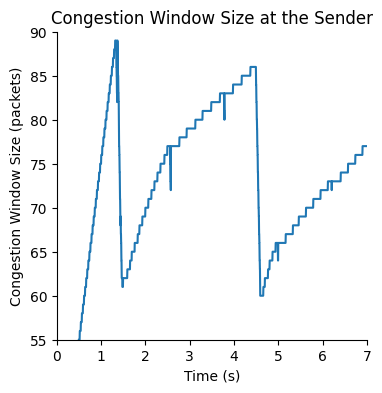

In [ ]:
# used to generate the rack plot 1
fig, ax = plt.subplots(figsize=(4, 4))

#fig, ax = plt.figure(figsize=(7, 4))

sb.lineplot(data=df, x='timestamp', y='snd_cwnd') # , hue='dest'
plt.xlim(0,7)
plt.ylim(55,90)
# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Time (s)")
plt.ylabel("Congestion Window Size (packets)")
plt.title("Congestion Window Size at the Sender")
#plt.grid(True)
plt.savefig("tcp_cwnd_plot_rack1.pdf")
plt.show()

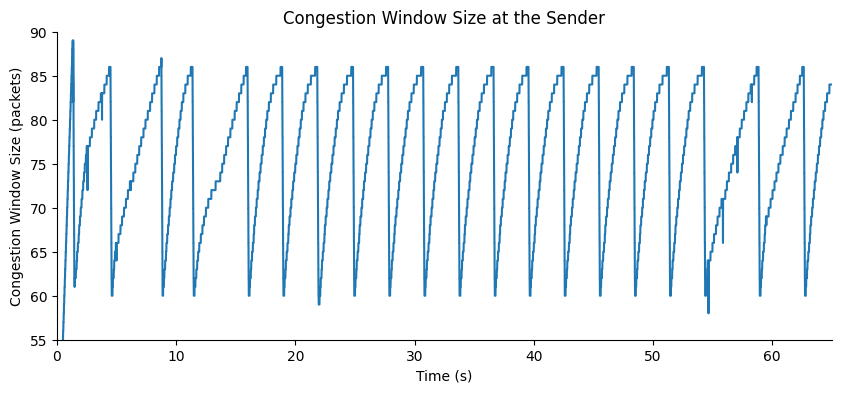

In [ ]:
# used to generate the rack plot 2
fig, ax = plt.subplots(figsize=(10, 4))

#fig, ax = plt.figure(figsize=(7, 4))

sb.lineplot(data=df, x='timestamp', y='snd_cwnd') # , hue='dest'
plt.xlim(0,65)
plt.ylim(55,90)
# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Time (s)")
plt.ylabel("Congestion Window Size (packets)")
plt.title("Congestion Window Size at the Sender")
#plt.grid(True)
plt.savefig("tcp_cwnd_plot_rack2.pdf")
plt.show()

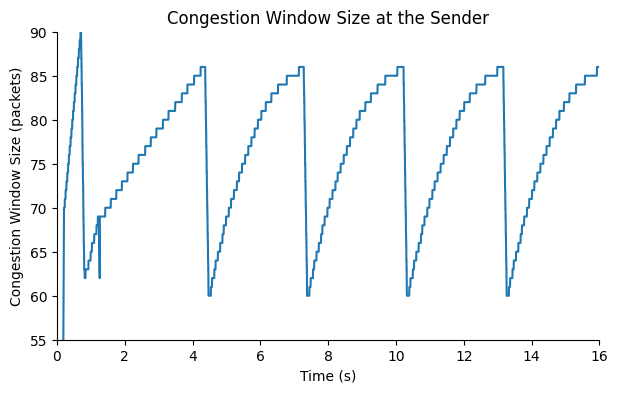

In [ ]:
# used to generate the adapthresh plot
fig, ax = plt.subplots(figsize=(7, 4))

#fig, ax = plt.figure(figsize=(7, 4))

sb.lineplot(data=df, x='timestamp', y='snd_cwnd') # , hue='dest'
plt.xlim(0,16)
plt.ylim(55,90)
# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Time (s)")
plt.ylabel("Congestion Window Size (packets)")
plt.title("Congestion Window Size at the Sender")
#plt.grid(True)
plt.savefig("tcp_cwnd_plot_adapthresh.pdf")
plt.show()

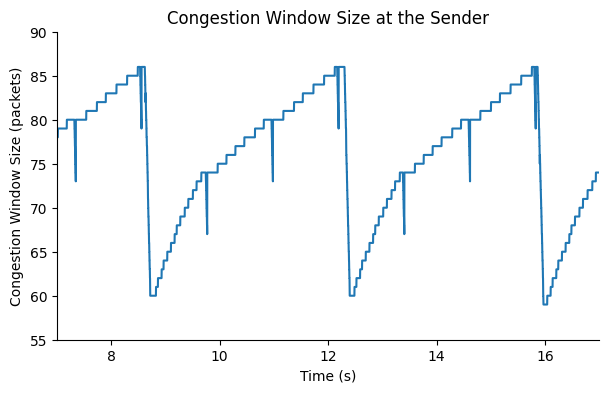

In [ ]:
# used to generate the 3thresh plot
fig, ax = plt.subplots(figsize=(7, 4))

#fig, ax = plt.figure(figsize=(7, 4))

sb.lineplot(data=df, x='timestamp', y='snd_cwnd') # , hue='dest'
plt.xlim(7,17)
plt.ylim(55,90)
# Remove top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlabel("Time (s)")
plt.ylabel("Congestion Window Size (packets)")
plt.title("Congestion Window Size at the Sender")
#plt.grid(True)
plt.savefig("tcp_cwnd_plot_3thresh.pdf")
plt.show()

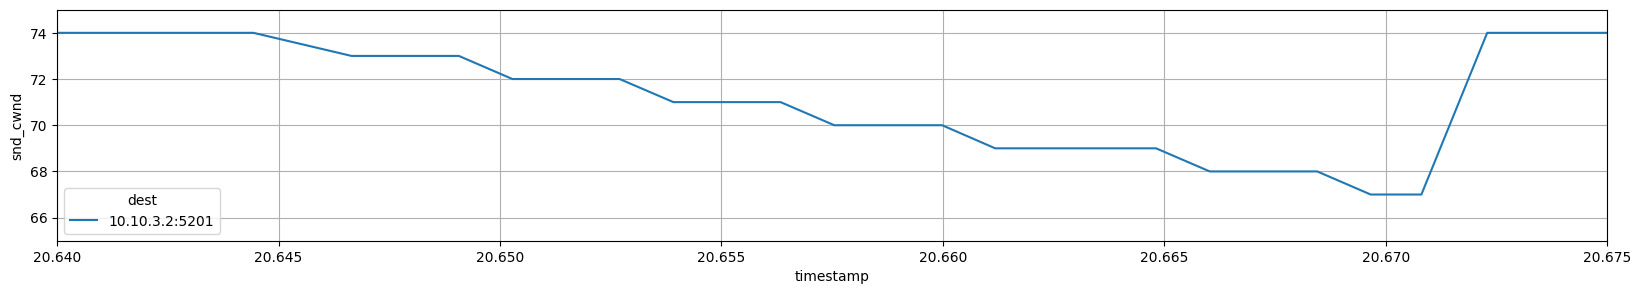

In [ ]:
plt.figure(figsize=(20,3))
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
plt.xlim(20.64,20.675)
plt.ylim(65,75)
plt.grid()

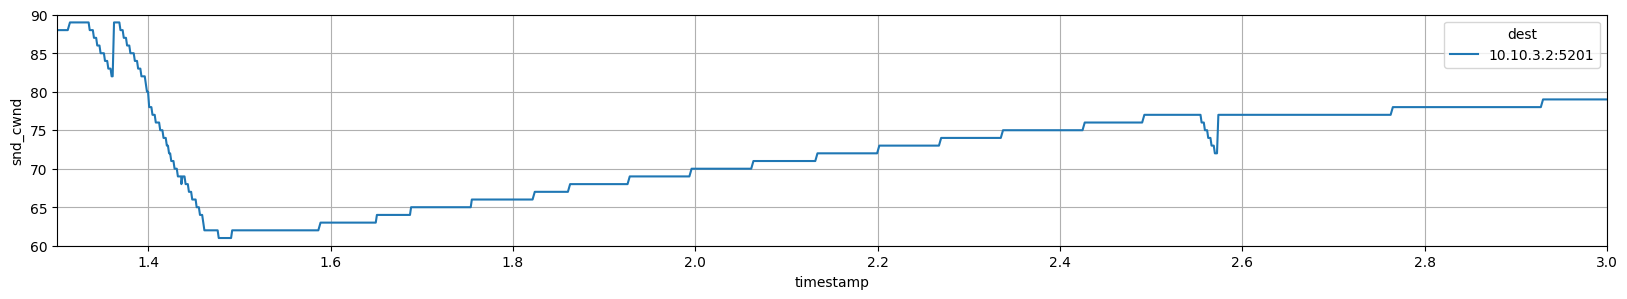

In [ ]:
plt.figure(figsize=(20,3))
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
plt.xlim(1.3,3)
plt.ylim(60,90)
plt.grid()

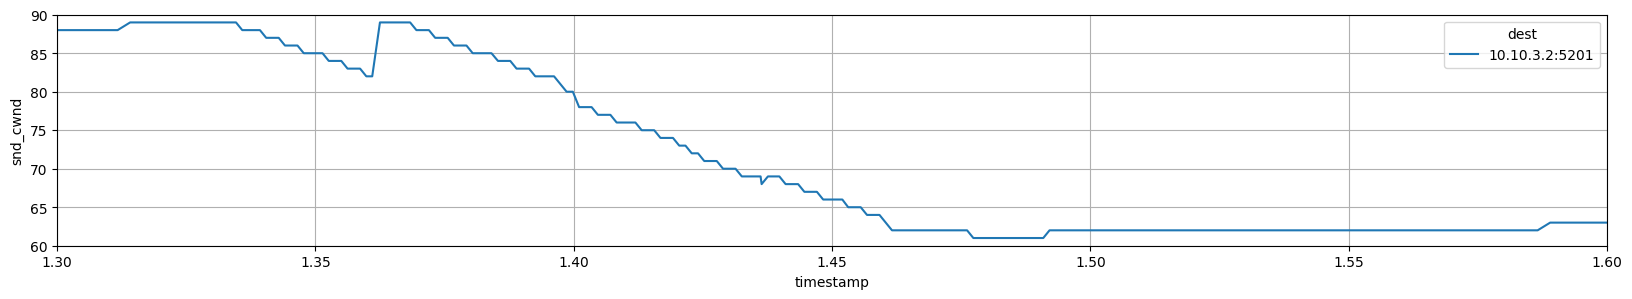

In [ ]:
plt.figure(figsize=(20,3))
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
plt.xlim(1.3,1.6)
plt.ylim(60,90)
plt.grid()

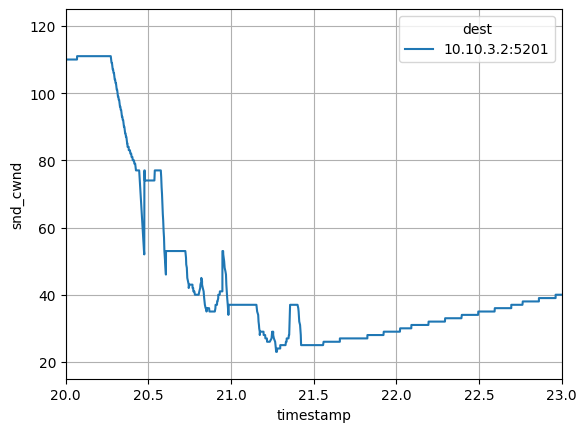

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
#plt.ylim(55,95)
plt.ylim(15,125)
plt.xlim(20,23)
#plt.xlim(2,2.2)
plt.grid()

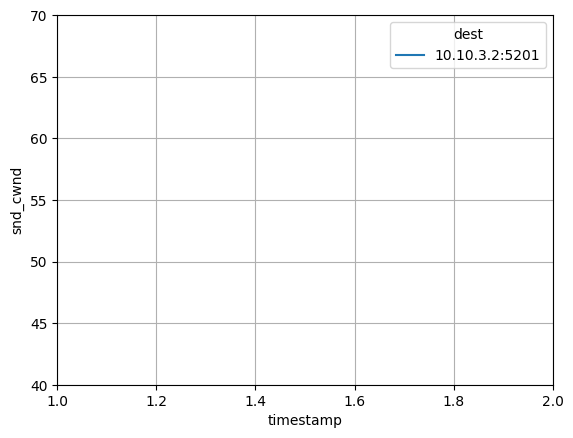

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
#plt.ylim(55,95)
plt.ylim(40,70)
plt.xlim(1,2)
plt.grid()

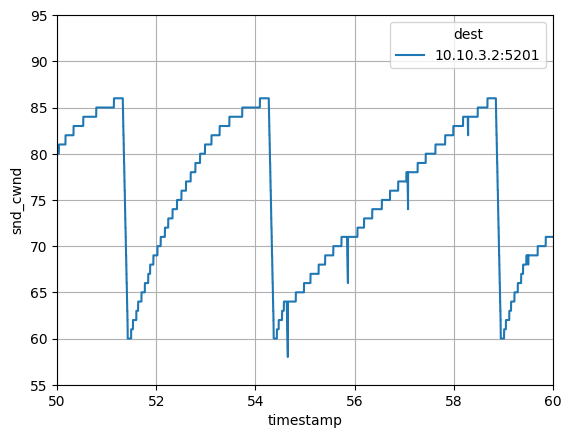

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
plt.ylim(55,95)
#plt.ylim(10,30)
plt.xlim(50,60)
plt.grid()

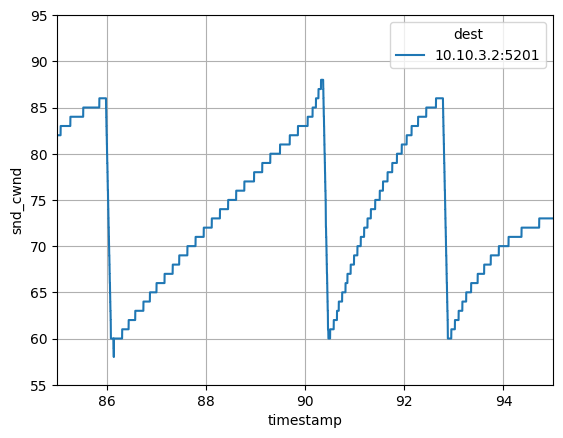

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
plt.ylim(55,95)
#plt.ylim(10,30)
plt.xlim(85,95)
plt.grid()

<Axes: xlabel='timestamp', ylabel='snd_cwnd'>

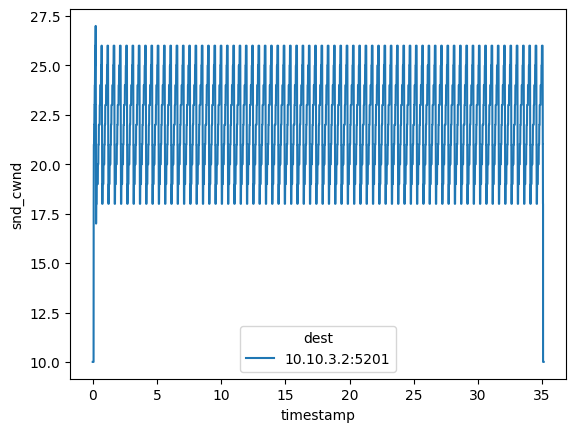

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')

(22437.0, 22439.0)

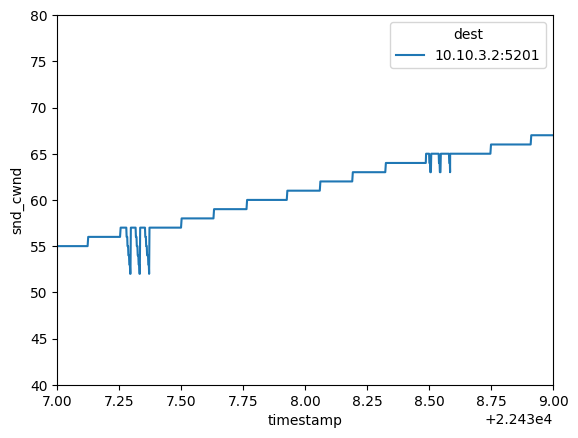

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
plt.ylim(40,80)
plt.xlim(22437,22439)

<Axes: xlabel='timestamp', ylabel='snd_cwnd'>

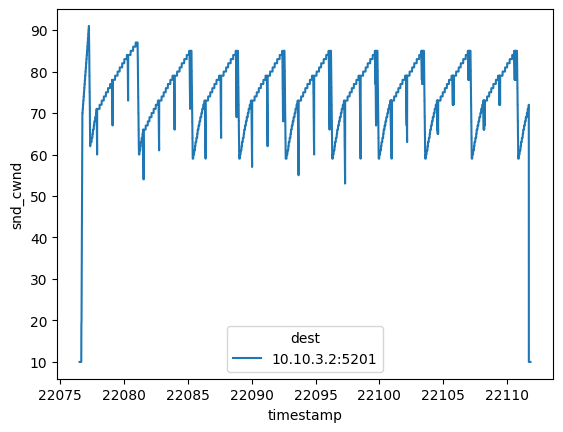

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')

(22080.0, 22090.0)

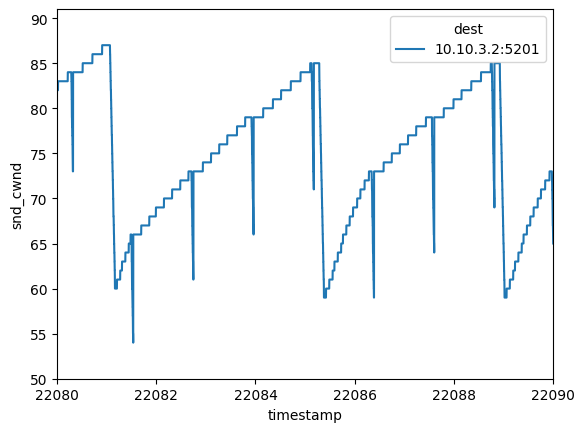

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
plt.ylim(50,91)
plt.xlim(22080,22090)

<Axes: xlabel='timestamp', ylabel='snd_cwnd'>

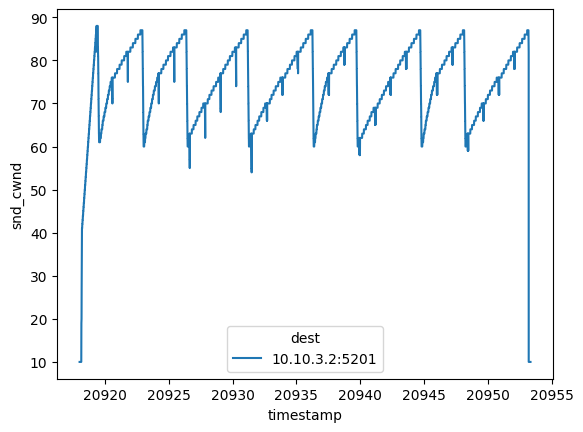

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')

(20930.0, 20940.0)

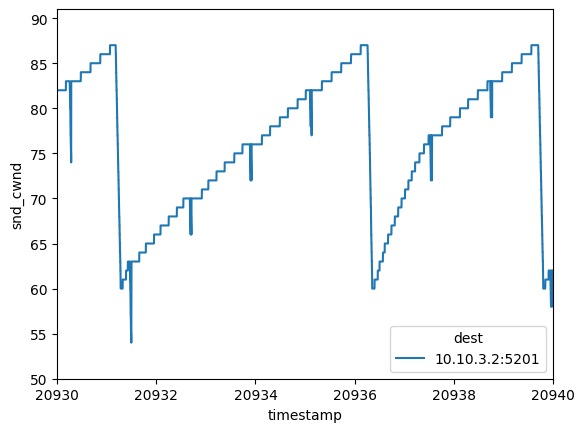

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
plt.ylim(50,91)
plt.xlim(20930,20940)

<Axes: xlabel='timestamp', ylabel='snd_cwnd'>

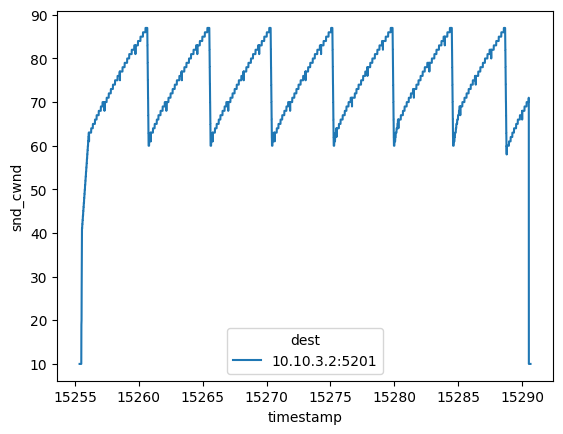

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')


(15263.2, 15263.5)

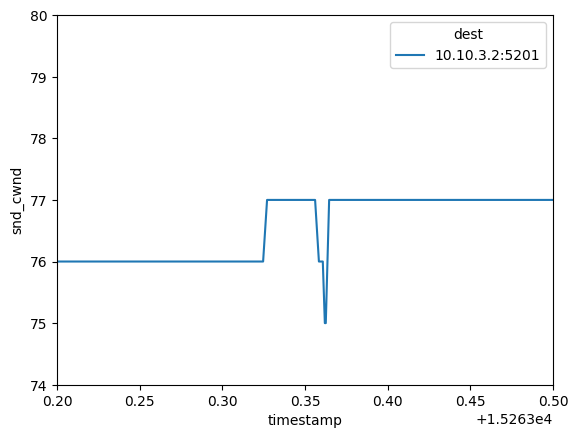

In [ ]:
sb.lineplot(data=df, x='timestamp', y='snd_cwnd', hue='dest')
#plt.ylim(50,90)
plt.ylim(74,80)
plt.xlim(15263.2,15263.5)

## Processing of .pcap files for Tracking Retransmissions

In [ ]:
%pip install scapy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scapy: filename=scapy-2.5.0-py2.py3-none-any.whl size=1444327 sha256=c82ecbaaedaa5a3103fde2dfe9f9e8720e67263a6424d2a1105b9c7d15524520
  Stored in directory: /root/.cache/pip/wheels/82/b7/03/8344d8cf6695624746311bc0d389e9d05535ca83c35f90241d
Successfully built scapy


In [ ]:
from scapy.all import rdpcap

def get_first_packet_timestamp(pcap_file):
    # Read the pcap file
    packets = rdpcap(pcap_file)
    # Check if there are packets in the file
    if packets:
        # Get the timestamp of the first packet
        first_packet_timestamp = packets[0].time
        return first_packet_timestamp
    else:
        return None

# Replace 'your_pcap_file.pcap' with the path to your pcap file
pcap_file = '/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exps0and1/exp1-rack.pcap'
timestamp = get_first_packet_timestamp(pcap_file)
if timestamp:
    print(f"Timestamp of the first captured packet: {timestamp}")
else:
    print("No packets found in the pcap file.")

Timestamp of the first captured packet: 1716573510.946362


In [ ]:
!apt install tshark

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libnl-genl-3-200 libpcap0.8 libsbc1
  libsmi2ldbl libspandsp2 libspeexdsp1 libwireshark-data libwireshark15
  libwiretap12 libwsutil13 wireshark-common
Suggested packages:
  snmp-mibs-downloader geoipupdate geoip-database geoip-database-extra
  libjs-leaflet libjs-leaflet.markercluster wireshark-doc
The following NEW packages will be installed:
  libbcg729-0 libc-ares2 liblua5.2-0 libnl-genl-3-200 libpcap0.8 libsbc1
  libsmi2ldbl libspandsp2 libspeexdsp1 libwireshark-data libwireshark15
  libwiretap12 libwsutil13 tshark wireshark-common
0 upgraded, 15 newly installed, 0 to remove and 35 not upgraded.
Need to get 23.0 MB of archives.
After this operation, 120 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpcap0.8 amd64 1.10.1-4ubuntu1.22.04.1

In [ ]:
%cd /content/drive/MyDrive/rack simpler exps/5_24_24_complete/exps0and1
!ls

/content/drive/MyDrive/rack simpler exps/5_24_24_complete/exps0and1
ack_progress.pdf	   exp1-rack.pcap
exp0-rack-noreord-log.txt  received_ranges_vlines.pdf
exp0-rack-noreord.pcap	   tcp_ack_sack_plot_3thresh.pdf
exp1-adapthresh-log.txt    tcp_ack_sack_plot_adapthresh.pdf
exp1-adapthresh.pcap	   tcp_ack_sack_plot.pdf
exp1-adapthresh_pcap.csv   tcp_cwnd_plot_3thresh.pdf
exp1-dupack-log.txt	   tcp_cwnd_plot_adapthresh.pdf
exp1-dupack.pcap	   tcp_cwnd_plot_rack1.pdf
exp1-dupack_pcap.csv	   tcp_cwnd_plot_rack2.pdf
exp1-rack-log.txt


In [ ]:
#!tshark -r exp1-dupack.pcap -T fields -e frame.time_epoch -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.seq_raw -e tcp.ack -e tcp.ack_raw -e tcp.len -E header=y -E separator=, -E occurrence=a > exp1-dupack_pcap.csv
#!tshark -r exp1-adapthresh.pcap -T fields -e frame.time_epoch -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.seq_raw -e tcp.ack -e tcp.ack_raw -e tcp.len -E header=y -E separator=, -E occurrence=a > exp1-adapthresh_pcap.csv
#!tshark -r exp1-rack.pcap -T fields -e frame.time_epoch -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.seq_raw -e tcp.ack -e tcp.ack_raw -e tcp.len -E header=y -E separator=, -E occurrence=a > exp1-rack_pcap.csv
!tshark -r exp0-rack-noreord.pcap -T fields -e frame.time_epoch -e ip.src -e ip.dst -e tcp.srcport -e tcp.dstport -e tcp.seq -e tcp.seq_raw -e tcp.ack -e tcp.ack_raw -e tcp.len -E header=y -E separator=, -E occurrence=a > exp0-rack-noreord_pcap.csv


Running as user "root" and group "root". This could be dangerous.


In [ ]:
#df_pcap = pd.read_csv(f'exp1-dupack_pcap.csv')
#df_pcap = pd.read_csv(f'exp1-adapthresh_pcap.csv')
#df_pcap = pd.read_csv(f'exp1-rack_pcap.csv')
df_pcap = pd.read_csv(f'exp0-rack-noreord_pcap.csv')


df_pcap['frame.time_epoch'] = df_pcap['frame.time_epoch'] - df_pcap['frame.time_epoch'][0]

df_pcap

,frame.time_epoch,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.seq,tcp.seq_raw,tcp.ack,tcp.ack_raw,tcp.len
0,0.000000,10.10.1.1,10.10.3.2,41598,5201,0,3381225901,0,0,0
1,0.000022,10.10.3.2,10.10.1.1,5201,41598,0,495363066,1,3381225902,0
2,0.021166,10.10.1.1,10.10.3.2,41598,5201,1,3381225902,1,495363067,0
3,0.021166,10.10.1.1,10.10.3.2,41598,5201,1,3381225902,1,495363067,37
4,0.021206,10.10.3.2,10.10.1.1,5201,41598,1,495363067,38,3381225939,0
...,...,...,...,...,...,...,...,...,...,...
44347,35.351014,10.10.1.1,10.10.3.2,41598,5201,438,3381226339,301,495363367,0
44348,35.351777,10.10.1.1,10.10.3.2,41598,5201,438,3381226339,301,495363367,1
44349,35.351778,10.10.1.1,10.10.3.2,41598,5201,439,3381226340,301,495363367,0
44350,35.351829,10.10.3.2,10.10.1.1,5201,41598,301,495363367,440,3381226341,0


In [ ]:
# prompt: get the source port with the maximum value count from here df_pcap['tcp.srcport'].value_counts()
df_pcap = df_pcap[ df_pcap['ip.src'] == '10.10.1.1' ]

# Get the value counts of tcp.srcport
srcport_counts = df_pcap['tcp.srcport'].value_counts()

# Get the source port with the maximum count
max_srcport = srcport_counts.idxmax()

df_pcap = df_pcap[ (df_pcap['tcp.srcport'] == max_srcport) ]

#drop the first row of df_pcap
df_pcap = df_pcap.iloc[1:].copy()

df_pcap.reset_index(inplace=True)
df_pcap

,index,frame.time_epoch,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.seq,tcp.seq_raw,tcp.ack,tcp.ack_raw,tcp.len
0,15,0.105468,10.10.1.1,10.10.3.2,41610,5201,1,2913094324,1,1198484445,0
1,16,0.105468,10.10.1.1,10.10.3.2,41610,5201,1,2913094324,1,1198484445,37
2,22,0.148517,10.10.1.1,10.10.3.2,41610,5201,38,2913094361,1,1198484445,1448
3,23,0.148517,10.10.1.1,10.10.3.2,41610,5201,1486,2913095809,1,1198484445,1448
4,26,0.149716,10.10.1.1,10.10.3.2,41610,5201,2934,2913097257,1,1198484445,1448
...,...,...,...,...,...,...,...,...,...,...,...
29003,44329,35.281977,10.10.1.1,10.10.3.2,41610,5201,41993486,2955087809,1,1198484445,1448
29004,44331,35.283186,10.10.1.1,10.10.3.2,41610,5201,41994934,2955089257,1,1198484445,1448
29005,44333,35.284399,10.10.1.1,10.10.3.2,41610,5201,41996382,2955090705,1,1198484445,1448
29006,44335,35.285609,10.10.1.1,10.10.3.2,41610,5201,41997830,2955092153,1,1198484445,1448


In [ ]:
df_pcap["end_seq"] = df_pcap["tcp.seq"] + df_pcap["tcp.len"]
df_pcap

,index,frame.time_epoch,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.seq,tcp.seq_raw,tcp.ack,tcp.ack_raw,tcp.len,end_seq
0,15,0.105468,10.10.1.1,10.10.3.2,41610,5201,1,2913094324,1,1198484445,0,1
1,16,0.105468,10.10.1.1,10.10.3.2,41610,5201,1,2913094324,1,1198484445,37,38
2,22,0.148517,10.10.1.1,10.10.3.2,41610,5201,38,2913094361,1,1198484445,1448,1486
3,23,0.148517,10.10.1.1,10.10.3.2,41610,5201,1486,2913095809,1,1198484445,1448,2934
4,26,0.149716,10.10.1.1,10.10.3.2,41610,5201,2934,2913097257,1,1198484445,1448,4382
...,...,...,...,...,...,...,...,...,...,...,...,...
29003,44329,35.281977,10.10.1.1,10.10.3.2,41610,5201,41993486,2955087809,1,1198484445,1448,41994934
29004,44331,35.283186,10.10.1.1,10.10.3.2,41610,5201,41994934,2955089257,1,1198484445,1448,41996382
29005,44333,35.284399,10.10.1.1,10.10.3.2,41610,5201,41996382,2955090705,1,1198484445,1448,41997830
29006,44335,35.285609,10.10.1.1,10.10.3.2,41610,5201,41997830,2955092153,1,1198484445,1448,41999278


In [ ]:
# prompt: create a sub dataframe from df_pcap by filtering them between 2 frame.time_epoch values of my choice

# 3thresh exp timestamps used
# Choose your desired start and end timestamps
#start_timestamp = 12.170  # Example: start from 10 seconds
#end_timestamp = 12.305 #12.295   # Example: end at 20 seconds

# adapthresh exp timestamps used
start_timestamp = 2.455  # Example: start from 10 seconds
end_timestamp = 2.585   # Example: end at 20 seconds

# Filter the DataFrame based on the frame.time_epoch
df_pcap_filtered = df_pcap[
    (df_pcap['frame.time_epoch'] >= start_timestamp) &
    (df_pcap['frame.time_epoch'] <= end_timestamp)
].copy() # Use .copy() to avoid SettingWithCopyWarning

# Display the filtered DataFrame
#min_seq_num = df_pcap_filtered["tcp.seq"][df_pcap_filtered.index.min()]
#df_pcap_filtered["tcp.seq"] = df_pcap_filtered["tcp.seq"] - min_seq_num
#df_pcap_filtered["end_seq"] = df_pcap_filtered["end_seq"] - min_seq_num
df_pcap_filtered

,index,frame.time_epoch,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.seq,tcp.seq_raw,tcp.ack,tcp.ack_raw,tcp.len,end_seq
1901,3156,2.455273,10.10.1.1,10.10.3.2,36292,5201,2748342,657258078,1,3844304015,1448,2749790
1902,3158,2.456483,10.10.1.1,10.10.3.2,36292,5201,2749790,657259526,1,3844304015,1448,2751238
1903,3159,2.457696,10.10.1.1,10.10.3.2,36292,5201,2751238,657260974,1,3844304015,1448,2752686
1904,3161,2.458906,10.10.1.1,10.10.3.2,36292,5201,2752686,657262422,1,3844304015,1448,2754134
1905,3162,2.460117,10.10.1.1,10.10.3.2,36292,5201,2754134,657263870,1,3844304015,1448,2755582
...,...,...,...,...,...,...,...,...,...,...,...,...
2004,3322,2.580024,10.10.1.1,10.10.3.2,36292,5201,2897486,657407222,1,3844304015,1448,2898934
2005,3324,2.581235,10.10.1.1,10.10.3.2,36292,5201,2898934,657408670,1,3844304015,1448,2900382
2006,3325,2.582445,10.10.1.1,10.10.3.2,36292,5201,2900382,657410118,1,3844304015,1448,2901830
2007,3327,2.583655,10.10.1.1,10.10.3.2,36292,5201,2901830,657411566,1,3844304015,1448,2903278


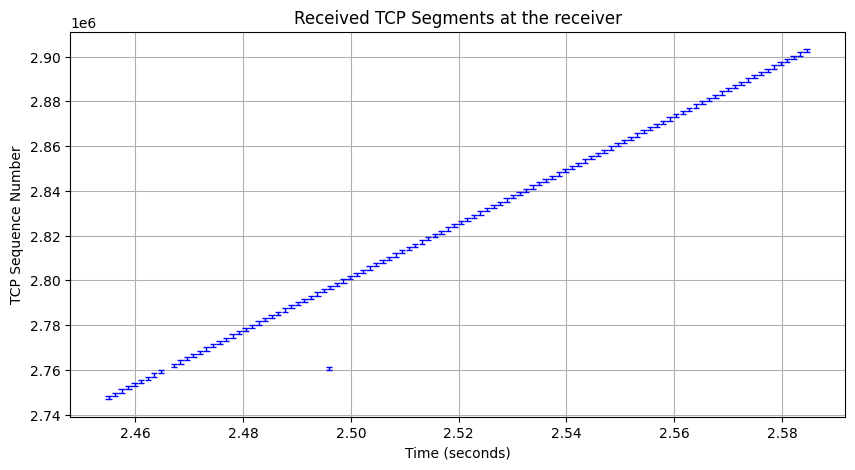

In [ ]:
# prompt: plot a vertical line for each row in df_pcap where the x coordinate is frame.time_epoch and y coordinates are tcp.seq (low) and end_seq (high)
cap_length = 0.0006  # in x-axis units (time)

plt.figure(figsize=(10, 5))
for index, row in df_pcap_filtered.iterrows():
    plt.vlines(x=row['frame.time_epoch'], ymin=row['tcp.seq'], ymax=row['end_seq'], color='blue', linestyle='-', lw=1)
    # Add caps
    plt.hlines(y=row['tcp.seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1)
    plt.hlines(y=row['end_seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1)

plt.xlabel('Time (seconds)')
plt.ylabel('TCP Sequence Number')
plt.title('Received TCP Segments at the receiver')
plt.grid(True)
plt.show()

In [ ]:
import pandas as pd
from bisect import bisect_left

# Example: df is your dataframe, already sorted by frame.time_epoch
df = df_pcap_filtered.sort_values('frame.time_epoch')

received_intervals = []  # list of (start, end) tuples
cumulative_ack_progress = []
selective_total_received = []

def insert_and_merge(intervals, new_interval):
    new_start, new_end = new_interval
    result = []
    inserted = False
    for s, e in intervals:
        if e < new_start:
            result.append((s, e))
        elif new_end < s:
            if not inserted:
                result.append((new_start, new_end))
                inserted = True
            result.append((s, e))
        else:
            new_start = min(new_start, s)
            new_end = max(new_end, e)
    if not inserted:
        result.append((new_start, new_end))
    return result

for _, row in df.iterrows():
    seg_start = row['tcp.seq']
    seg_end = row['end_seq']

    # Insert and merge into received_intervals
    received_intervals = insert_and_merge(received_intervals, (seg_start, seg_end))

    # Cumulative ACK is the end of the first interval if starting from base
    base_seq = df.iloc[0]['tcp.seq']
    if received_intervals and received_intervals[0][0] == base_seq:
        cum_ack = received_intervals[0][1] - base_seq
    else:
        cum_ack = 0

    cumulative_ack_progress.append(cum_ack)

    # Selective received is the sum of all intervals
    sel_ack = sum(end - start for start, end in received_intervals)
    selective_total_received.append(sel_ack)

# Add as columns
df['cumulative_ack_bytes'] = cumulative_ack_progress
df['selective_ack_bytes'] = selective_total_received

In [ ]:
df

,index,frame.time_epoch,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.seq,tcp.seq_raw,tcp.ack,tcp.ack_raw,tcp.len,end_seq,cumulative_ack_bytes,selective_ack_bytes
1900,3078,2.455017,10.10.1.1,10.10.3.2,44072,5201,2746894,2879476117,1,2108471220,1448,2748342,1448,1448
1901,3079,2.456218,10.10.1.1,10.10.3.2,44072,5201,2748342,2879477565,1,2108471220,1448,2749790,2896,2896
1902,3081,2.457440,10.10.1.1,10.10.3.2,44072,5201,2749790,2879479013,1,2108471220,1448,2751238,4344,4344
1903,3082,2.458666,10.10.1.1,10.10.3.2,44072,5201,2751238,2879480461,1,2108471220,1448,2752686,5792,5792
1904,3084,2.459861,10.10.1.1,10.10.3.2,44072,5201,2752686,2879481909,1,2108471220,1448,2754134,7240,7240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,3243,2.579762,10.10.1.1,10.10.3.2,44072,5201,2896038,2879625261,1,2108471220,1448,2897486,150592,150592
2004,3245,2.580982,10.10.1.1,10.10.3.2,44072,5201,2897486,2879626709,1,2108471220,1448,2898934,152040,152040
2005,3246,2.582186,10.10.1.1,10.10.3.2,44072,5201,2898934,2879628157,1,2108471220,1448,2900382,153488,153488
2006,3248,2.583406,10.10.1.1,10.10.3.2,44072,5201,2900382,2879629605,1,2108471220,1448,2901830,154936,154936


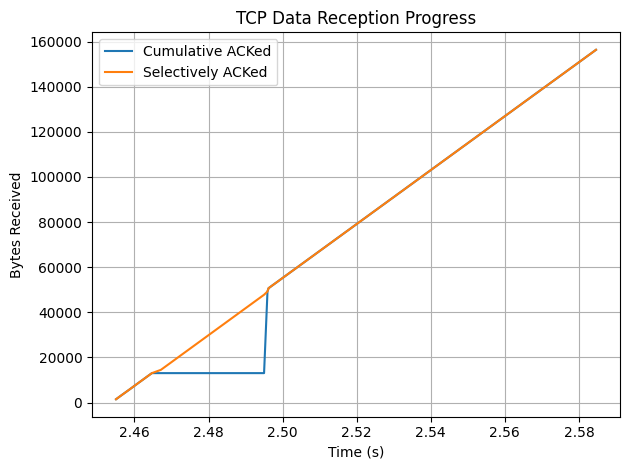

In [ ]:
import matplotlib.pyplot as plt

plt.plot(df['frame.time_epoch'], df['cumulative_ack_bytes'], label='Cumulative ACKed')
plt.plot(df['frame.time_epoch'], df['selective_ack_bytes'], label='Selectively ACKed')
plt.xlabel("Time (s)")
plt.ylabel("Bytes Received")
plt.title("TCP Data Reception Progress")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("ack_progress.pdf")
plt.show()

In [ ]:
import pandas as pd
from copy import deepcopy

# Make sure df is sorted by time
df = df.sort_values('frame.time_epoch').copy()

def insert_and_merge(intervals, new_interval):
    new_start, new_end = new_interval
    result = []
    inserted = False
    for s, e in intervals:
        if e < new_start:
            result.append((s, e))
        elif new_end < s:
            if not inserted:
                result.append((new_start, new_end))
                inserted = True
            result.append((s, e))
        else:
            new_start = min(new_start, s)
            new_end = max(new_end, e)
    if not inserted:
        result.append((new_start, new_end))
    return result

received_intervals = []
interval_snapshots = []

for _, row in df.iterrows():
    seg_range = (row['tcp.seq'], row['end_seq'])
    received_intervals = insert_and_merge(received_intervals, seg_range)

    # Store a deep copy of the current interval state
    interval_snapshots.append(deepcopy(received_intervals))

# Add to DataFrame
df['received_ranges'] = interval_snapshots


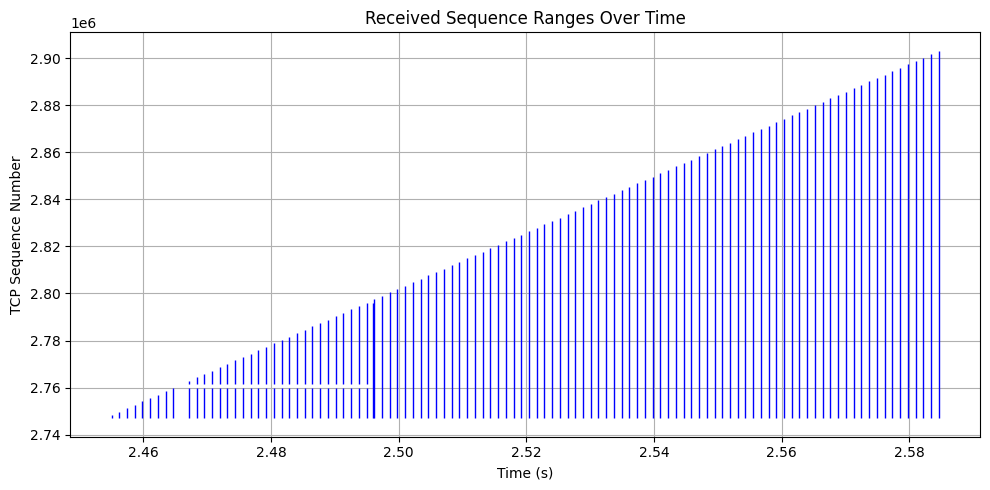

In [ ]:

fig, ax = plt.subplots(figsize=(10, 5))

for _, row in df.iterrows():
    t = row['frame.time_epoch']
    for start, end in row['received_ranges']:
        ax.vlines(x=t, ymin=start, ymax=end, color='blue', linewidth=1)

ax.set_xlabel("Time (s)")
ax.set_ylabel("TCP Sequence Number")
ax.set_title("Received Sequence Ranges Over Time")
ax.grid(True)
plt.tight_layout()
plt.savefig("received_ranges_vlines.pdf")
plt.show()

In [ ]:
base_seq = df.iloc[0]['tcp.seq']  # starting sequence number
cumulative_acks = []
sack_blocks = []

for ranges in df['received_ranges']:
    if ranges and ranges[0][0] == base_seq:
        cumulative_acks.append(ranges[0][1])
        sack_blocks.append(ranges[1:])
    else:
        cumulative_acks.append(None)
        sack_blocks.append(ranges)  # All considered SACKed (no cumulative yet)

df['cumulative_ack'] = cumulative_acks
df['sack_blocks'] = sack_blocks
df

,index,frame.time_epoch,ip.src,ip.dst,tcp.srcport,tcp.dstport,tcp.seq,tcp.seq_raw,tcp.ack,tcp.ack_raw,tcp.len,end_seq,cumulative_ack_bytes,selective_ack_bytes,received_ranges,cumulative_ack,sack_blocks
1900,3078,2.455017,10.10.1.1,10.10.3.2,44072,5201,2746894,2879476117,1,2108471220,1448,2748342,1448,1448,"[(2746894, 2748342)]",2748342,[]
1901,3079,2.456218,10.10.1.1,10.10.3.2,44072,5201,2748342,2879477565,1,2108471220,1448,2749790,2896,2896,"[(2746894, 2749790)]",2749790,[]
1902,3081,2.457440,10.10.1.1,10.10.3.2,44072,5201,2749790,2879479013,1,2108471220,1448,2751238,4344,4344,"[(2746894, 2751238)]",2751238,[]
1903,3082,2.458666,10.10.1.1,10.10.3.2,44072,5201,2751238,2879480461,1,2108471220,1448,2752686,5792,5792,"[(2746894, 2752686)]",2752686,[]
1904,3084,2.459861,10.10.1.1,10.10.3.2,44072,5201,2752686,2879481909,1,2108471220,1448,2754134,7240,7240,"[(2746894, 2754134)]",2754134,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2003,3243,2.579762,10.10.1.1,10.10.3.2,44072,5201,2896038,2879625261,1,2108471220,1448,2897486,150592,150592,"[(2746894, 2897486)]",2897486,[]
2004,3245,2.580982,10.10.1.1,10.10.3.2,44072,5201,2897486,2879626709,1,2108471220,1448,2898934,152040,152040,"[(2746894, 2898934)]",2898934,[]
2005,3246,2.582186,10.10.1.1,10.10.3.2,44072,5201,2898934,2879628157,1,2108471220,1448,2900382,153488,153488,"[(2746894, 2900382)]",2900382,[]
2006,3248,2.583406,10.10.1.1,10.10.3.2,44072,5201,2900382,2879629605,1,2108471220,1448,2901830,154936,154936,"[(2746894, 2901830)]",2901830,[]


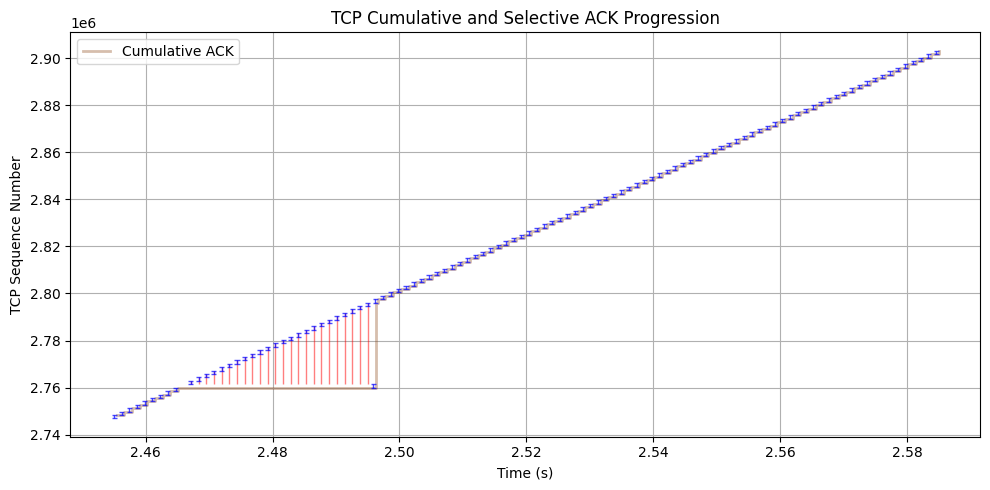

In [ ]:
cap_length = 0.0004  # in x-axis units (time)
fig, ax = plt.subplots(figsize=(10, 5))

# 1. Plot cumulative ACK progression as a stepped line
df_valid_ack = df[df['cumulative_ack'].notnull()]
ax.step(df_valid_ack['frame.time_epoch']+cap_length, df_valid_ack['cumulative_ack'],
        where='post', color='saddlebrown', label='Cumulative ACK', linewidth=2, alpha=0.35)

# 2. Plot SACK blocks (non-contiguous, out-of-order ranges)
for _, row in df.iterrows():
    t = row['frame.time_epoch']
    for start, end in row['sack_blocks']:
        ax.vlines(x=t, ymin=start, ymax=end, color='red', linewidth=1, alpha=0.5)

for index, row in df_pcap_filtered.iterrows():
    plt.vlines(x=row['frame.time_epoch'], ymin=row['tcp.seq'], ymax=row['end_seq'], color='blue', linestyle='-', lw=1, alpha=0.7)
    # Add caps
    plt.hlines(y=row['tcp.seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)
    plt.hlines(y=row['end_seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)

ax.set_xlabel("Time (s)")
ax.set_ylabel("TCP Sequence Number")
ax.set_title("TCP Cumulative and Selective ACK Progression")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.savefig("tcp_ack_sack_plot.pdf")
plt.show()

In [ ]:
!pip install brokenaxes

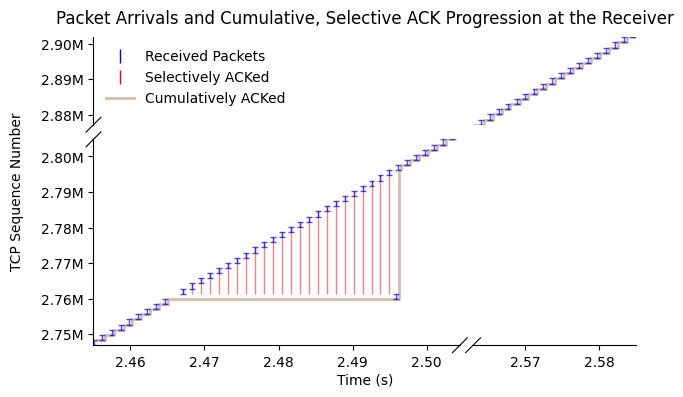

In [ ]:
#used to generate the adapthresh plot

from brokenaxes import brokenaxes
#from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines


cap_length = 0.0004  # in x-axis units (time)
#fig = plt.subplots(figsize=(10, 5))
fig = plt.figure(figsize=(7, 4))

x0 = start_timestamp  #= 12.175  # Example: start from 10 seconds
x1 = x0+0.0495
x3 = end_timestamp #= 12.3   # Example: end at 20 seconds
x2= x3-0.022 #0.017

y0=df.iloc[0]['tcp.seq']
y1=df[df["frame.time_epoch"]<x1].iloc[-1]['tcp.seq']
y2=df[df["frame.time_epoch"]>x2].iloc[0]['tcp.seq']
y3=df.iloc[-1]['tcp.seq']

bax = brokenaxes(xlims=((x0, x1), (x2, x3)), ylims=((y0, y1), (y2, y3)), hspace=0.1, wspace=0.05)


# 1. Plot cumulative ACK progression as a stepped line
df_valid_ack = df[df['cumulative_ack'].notnull()]
bax.step(df_valid_ack['frame.time_epoch']+cap_length, df_valid_ack['cumulative_ack'],
        where='post', color='saddlebrown', label='Cumulatively ACKed', linewidth=2, alpha=0.35)

# 2. Plot SACK blocks (non-contiguous, out-of-order ranges)
for _, row in df.iterrows():
    t = row['frame.time_epoch']
    for start, end in row['sack_blocks']:
        bax.vlines(x=t, ymin=start, ymax=end, color='red', linewidth=1, alpha=0.5)

for index, row in df_pcap_filtered.iterrows():
    bax.vlines(x=row['frame.time_epoch'], ymin=row['tcp.seq'], ymax=row['end_seq'], color='blue', linestyle='-', lw=1, alpha=0.7)
    # Add caps
    bax.hlines(y=row['tcp.seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)
    bax.hlines(y=row['end_seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)

'''
# Remove tick labels from all internal axes
for i, ax in enumerate(bax.axs):  # bax.axs is a list of Axes when only one break
    # Only keep x labels on the last axis
    if i != len(bax.axs) - 1:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    # Only keep y labels on the first axis
    if i != 0:
        ax.set_yticklabels([])
        ax.set_ylabel("")
'''
# Add dashed vertical line at end of left segment (x1)
#bax.axs[0].axvline(x=x1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Add dashed vertical line at start of right segment (x2)
#bax.axs[1].axvline(x=x2, color='gray', linestyle='--', linewidth=1, alpha=0.7)


#bax.vlines(x=[x1-0.001,x2], ymin=[y0,y0], ymax=[y1,y2], color='gray', linestyle='--', lw=1, alpha=0.7)
    # Add caps
#bax.hlines(y=row['tcp.seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)

# Create proxy artists for legend
received_line = mlines.Line2D([], [], color='blue', marker='|', linestyle='None', markersize=10, label='Received Packets')
sack_line     = mlines.Line2D([], [], color='red', marker='|', linestyle='None', markersize=10, label='Selectively ACKed')

def millions_formatter(x, _):
    return f"{x / 1e6:.2f}M"

for ax in bax.axs:
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

bax.set_xlabel("Time (s)", labelpad=20)
bax.set_ylabel("TCP Sequence Number", labelpad=50)
bax.set_title("Packet Arrivals and Cumulative, Selective ACK Progression at the Receiver", pad=10)

# 2. Get existing legend handles (e.g., from cumulative ACK step plot)
handles_existing, labels_existing = bax.axs[0].get_legend_handles_labels()

# 3. Combine only labeled existing handles
existing = [(h, l) for h, l in zip(handles_existing, labels_existing) if l]

# 4. Combine with new labeled entries
#all_handles = [h for h, _ in existing] + [received_line, sack_line]
#all_labels  = [l for _, l in existing] + ['Received packets', 'Selectively ACKed']

# 4. Combine with new labeled entries
#all_handles = [received_line] + [h for h, _ in existing] + [sack_line]
#all_labels  = ['Received Packets'] + [l for _, l in existing] + ['Selectively ACKed']
all_handles = [received_line, sack_line] + [h for h, _ in existing]
all_labels  = ['Received Packets', 'Selectively ACKed'] + [l for _, l in existing]


# 5. Set legend
bax.legend(handles=all_handles, labels=all_labels, loc='upper left', frameon=False)

#bax.grid(True, alpha=0.5)
#bax.legend(loc='upper left')
# Add to legend (with existing ones if any)

#plt.tight_layout()
plt.savefig("tcp_ack_sack_plot_adapthresh.pdf")
plt.show()




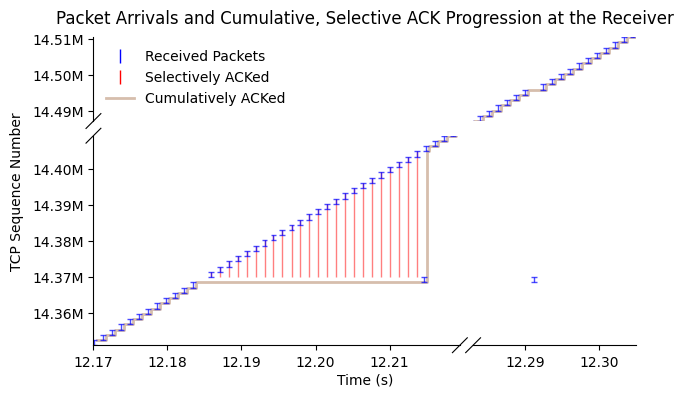

In [ ]:
#used to generate the 3thresh plot v2

from brokenaxes import brokenaxes
#from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines


cap_length = 0.0004  # in x-axis units (time)
#fig = plt.subplots(figsize=(10, 5))
fig = plt.figure(figsize=(7, 4))

x0 = start_timestamp  #= 12.175  # Example: start from 10 seconds
x1 = x0+0.0495
x3 = end_timestamp #= 12.3   # Example: end at 20 seconds
x2= x3-0.022

y0=df.iloc[0]['tcp.seq']
y1=df[df["frame.time_epoch"]<x1].iloc[-1]['tcp.seq']
y2=df[df["frame.time_epoch"]>x2].iloc[0]['tcp.seq']
y3=df.iloc[-1]['tcp.seq']

bax = brokenaxes(xlims=((x0, x1), (x2, x3)), ylims=((y0, y1), (y2, y3)), hspace=0.1, wspace=0.05)


# 1. Plot cumulative ACK progression as a stepped line
df_valid_ack = df[df['cumulative_ack'].notnull()]
bax.step(df_valid_ack['frame.time_epoch']+cap_length, df_valid_ack['cumulative_ack'],
        where='post', color='saddlebrown', label='Cumulatively ACKed', linewidth=2, alpha=0.35)

# 2. Plot SACK blocks (non-contiguous, out-of-order ranges)
for _, row in df.iterrows():
    t = row['frame.time_epoch']
    for start, end in row['sack_blocks']:
        bax.vlines(x=t, ymin=start, ymax=end, color='red', linewidth=1, alpha=0.5)

for index, row in df_pcap_filtered.iterrows():
    bax.vlines(x=row['frame.time_epoch'], ymin=row['tcp.seq'], ymax=row['end_seq'], color='blue', linestyle='-', lw=1, alpha=0.7)
    # Add caps
    bax.hlines(y=row['tcp.seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)
    bax.hlines(y=row['end_seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)

'''
# Remove tick labels from all internal axes
for i, ax in enumerate(bax.axs):  # bax.axs is a list of Axes when only one break
    # Only keep x labels on the last axis
    if i != len(bax.axs) - 1:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    # Only keep y labels on the first axis
    if i != 0:
        ax.set_yticklabels([])
        ax.set_ylabel("")
'''
# Add dashed vertical line at end of left segment (x1)
#bax.axs[0].axvline(x=x1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Add dashed vertical line at start of right segment (x2)
#bax.axs[1].axvline(x=x2, color='gray', linestyle='--', linewidth=1, alpha=0.7)


#bax.vlines(x=[x1-0.001,x2], ymin=[y0,y0], ymax=[y1,y2], color='gray', linestyle='--', lw=1, alpha=0.7)
    # Add caps
#bax.hlines(y=row['tcp.seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)

# Create proxy artists for legend
received_line = mlines.Line2D([], [], color='blue', marker='|', linestyle='None', markersize=10, label='Received Packets')
sack_line     = mlines.Line2D([], [], color='red', marker='|', linestyle='None', markersize=10, label='Selectively ACKed')

def millions_formatter(x, _):
    return f"{x / 1e6:.2f}M"

for ax in bax.axs:
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

bax.set_xlabel("Time (s)", labelpad=20)
bax.set_ylabel("TCP Sequence Number", labelpad=50)
bax.set_title("Packet Arrivals and Cumulative, Selective ACK Progression at the Receiver", pad=10)

# 2. Get existing legend handles (e.g., from cumulative ACK step plot)
handles_existing, labels_existing = bax.axs[0].get_legend_handles_labels()

# 3. Combine only labeled existing handles
existing = [(h, l) for h, l in zip(handles_existing, labels_existing) if l]

# 4. Combine with new labeled entries
#all_handles = [h for h, _ in existing] + [received_line, sack_line]
#all_labels  = [l for _, l in existing] + ['Received packets', 'Selectively ACKed']

# 4. Combine with new labeled entries
#all_handles = [received_line] + [h for h, _ in existing] + [sack_line]
#all_labels  = ['Received Packets'] + [l for _, l in existing] + ['Selectively ACKed']
all_handles = [received_line, sack_line] + [h for h, _ in existing]
all_labels  = ['Received Packets', 'Selectively ACKed'] + [l for _, l in existing]


# 5. Set legend
bax.legend(handles=all_handles, labels=all_labels, loc='upper left', frameon=False)

#bax.grid(True, alpha=0.5)
#bax.legend(loc='upper left')
# Add to legend (with existing ones if any)

#plt.tight_layout()
plt.savefig("tcp_ack_sack_plot_3thresh.pdf")
plt.show()




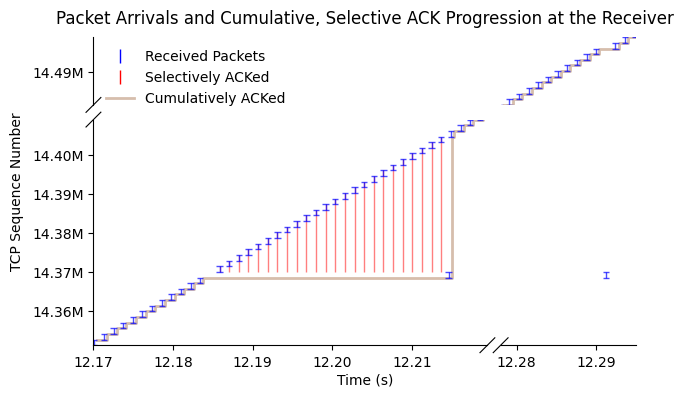

In [ ]:
#used to generate the 3thresh plot

from brokenaxes import brokenaxes
#from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter
import matplotlib.lines as mlines


cap_length = 0.0004  # in x-axis units (time)
#fig = plt.subplots(figsize=(10, 5))
fig = plt.figure(figsize=(7, 4))

x0 = start_timestamp  #= 12.175  # Example: start from 10 seconds
x1 = x0+0.0495
x3 = end_timestamp #= 12.3   # Example: end at 20 seconds
x2= x3-0.017

y0=df.iloc[0]['tcp.seq']
y1=df[df["frame.time_epoch"]<x1].iloc[-1]['tcp.seq']
y2=df[df["frame.time_epoch"]>x2].iloc[0]['tcp.seq']
y3=df.iloc[-1]['tcp.seq']

bax = brokenaxes(xlims=((x0, x1), (x2, x3)), ylims=((y0, y1), (y2, y3)), hspace=0.1, wspace=0.05)


# 1. Plot cumulative ACK progression as a stepped line
df_valid_ack = df[df['cumulative_ack'].notnull()]
bax.step(df_valid_ack['frame.time_epoch']+cap_length, df_valid_ack['cumulative_ack'],
        where='post', color='saddlebrown', label='Cumulatively ACKed', linewidth=2, alpha=0.35)

# 2. Plot SACK blocks (non-contiguous, out-of-order ranges)
for _, row in df.iterrows():
    t = row['frame.time_epoch']
    for start, end in row['sack_blocks']:
        bax.vlines(x=t, ymin=start, ymax=end, color='red', linewidth=1, alpha=0.5)

for index, row in df_pcap_filtered.iterrows():
    bax.vlines(x=row['frame.time_epoch'], ymin=row['tcp.seq'], ymax=row['end_seq'], color='blue', linestyle='-', lw=1, alpha=0.7)
    # Add caps
    bax.hlines(y=row['tcp.seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)
    bax.hlines(y=row['end_seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)

'''
# Remove tick labels from all internal axes
for i, ax in enumerate(bax.axs):  # bax.axs is a list of Axes when only one break
    # Only keep x labels on the last axis
    if i != len(bax.axs) - 1:
        ax.set_xticklabels([])
        ax.set_xlabel("")
    # Only keep y labels on the first axis
    if i != 0:
        ax.set_yticklabels([])
        ax.set_ylabel("")
'''
# Add dashed vertical line at end of left segment (x1)
#bax.axs[0].axvline(x=x1, color='gray', linestyle='--', linewidth=1, alpha=0.7)

# Add dashed vertical line at start of right segment (x2)
#bax.axs[1].axvline(x=x2, color='gray', linestyle='--', linewidth=1, alpha=0.7)


#bax.vlines(x=[x1-0.001,x2], ymin=[y0,y0], ymax=[y1,y2], color='gray', linestyle='--', lw=1, alpha=0.7)
    # Add caps
#bax.hlines(y=row['tcp.seq'], xmin=row['frame.time_epoch'] - cap_length, xmax=row['frame.time_epoch'] + cap_length, color='blue', lw=1, alpha=0.7)

# Create proxy artists for legend
received_line = mlines.Line2D([], [], color='blue', marker='|', linestyle='None', markersize=10, label='Received Packets')
sack_line     = mlines.Line2D([], [], color='red', marker='|', linestyle='None', markersize=10, label='Selectively ACKed')

def millions_formatter(x, _):
    return f"{x / 1e6:.2f}M"

for ax in bax.axs:
    ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

bax.set_xlabel("Time (s)", labelpad=20)
bax.set_ylabel("TCP Sequence Number", labelpad=50)
bax.set_title("Packet Arrivals and Cumulative, Selective ACK Progression at the Receiver", pad=10)

# 2. Get existing legend handles (e.g., from cumulative ACK step plot)
handles_existing, labels_existing = bax.axs[0].get_legend_handles_labels()

# 3. Combine only labeled existing handles
existing = [(h, l) for h, l in zip(handles_existing, labels_existing) if l]

# 4. Combine with new labeled entries
#all_handles = [h for h, _ in existing] + [received_line, sack_line]
#all_labels  = [l for _, l in existing] + ['Received packets', 'Selectively ACKed']

# 4. Combine with new labeled entries
#all_handles = [received_line] + [h for h, _ in existing] + [sack_line]
#all_labels  = ['Received Packets'] + [l for _, l in existing] + ['Selectively ACKed']
all_handles = [received_line, sack_line] + [h for h, _ in existing]
all_labels  = ['Received Packets', 'Selectively ACKed'] + [l for _, l in existing]


# 5. Set legend
bax.legend(handles=all_handles, labels=all_labels, loc='upper left', frameon=False)

#bax.grid(True, alpha=0.5)
#bax.legend(loc='upper left')
# Add to legend (with existing ones if any)

#plt.tight_layout()
plt.savefig("tcp_ack_sack_plot_3thresh.pdf")
plt.show()





Note: Some of the plotting/processing steps may be created with assistance from ChatGPT or Gemini.